In [1]:
"""
TRAIN과 TEST dataset의 분포 차이 보기
두 개 분포 차이가 있다면 TRAIN에 맞춰 학습시킨다면 TEST의 성능을 예측하지 못하는 게 아닌가 싶었는데,
컴피티션에서는 당연하게도 두 개의 분포가 거의 동일함
"""

'\nTRAIN과 TEST dataset의 분포 차이 보기\n두 개 분포 차이가 있다면 TRAIN에 맞춰 학습시킨다면 TEST의 성능을 예측하지 못하는 게 아닌가 싶었는데,\n컴피티션에서는 당연하게도 두 개의 분포가 거의 동일함\n'

In [1]:
import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)      # Show all rows

In [6]:
train = pd.read_csv('input/train.csv', index_col='id')
test = pd.read_csv('input/test.csv', index_col='id')

train.drop(['defects'], axis=1, inplace=True)

In [7]:
train.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0


In [8]:
test.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,,
101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,22636.74,0.27,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,14482.46,0.22,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,116160.08,1.28,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,16135.47,0.29,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,2624.49,0.08,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


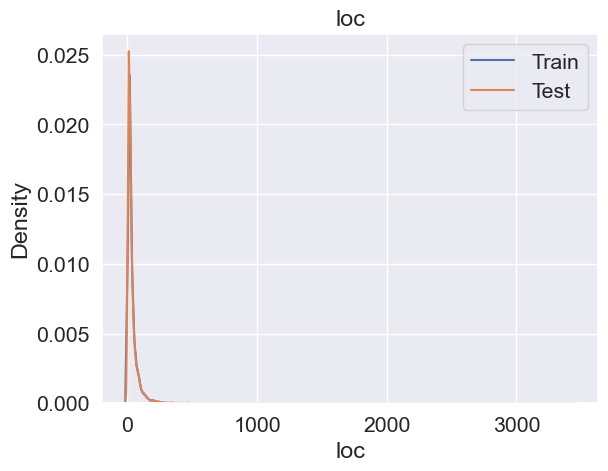

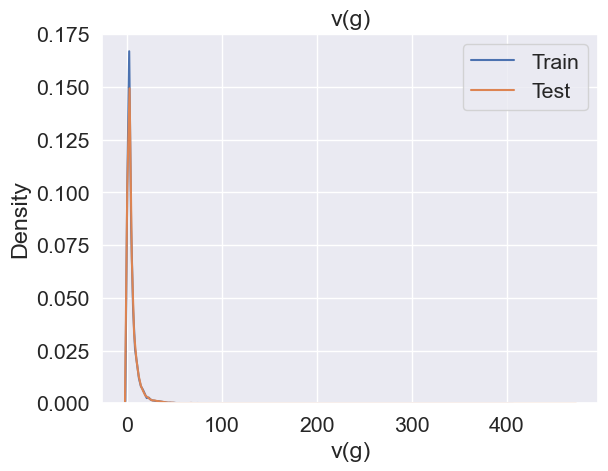

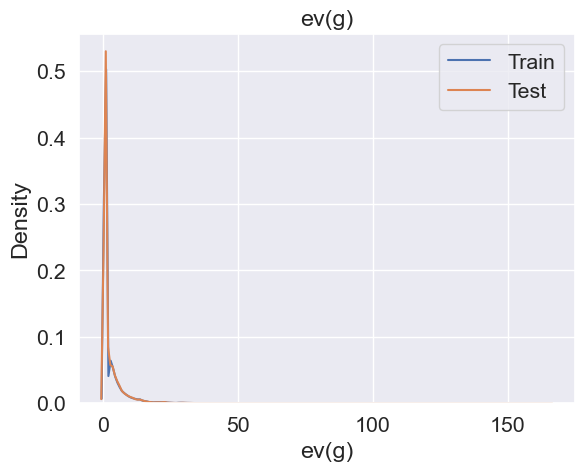

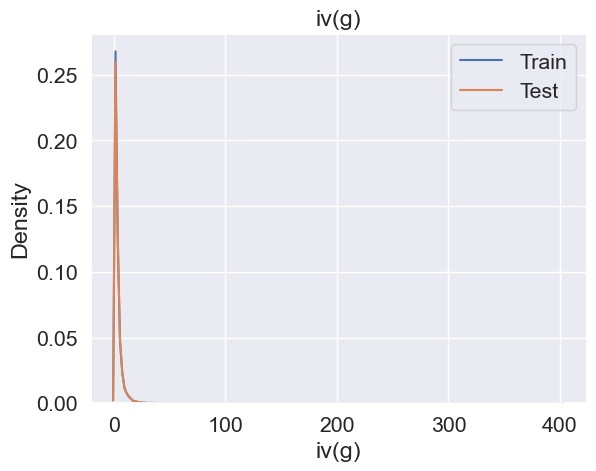

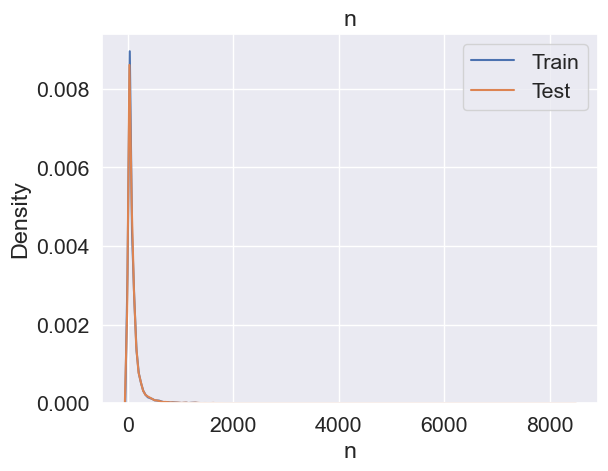

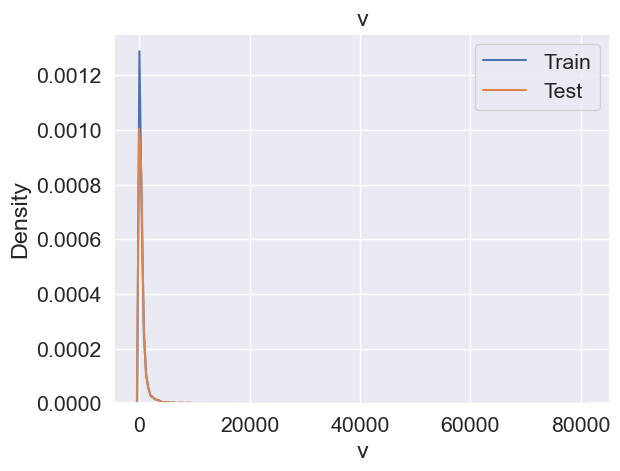

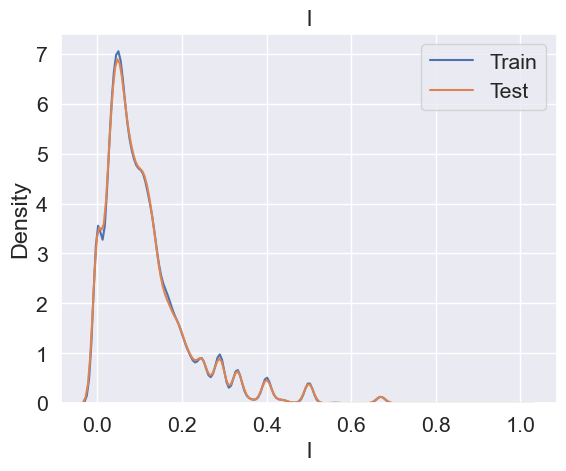

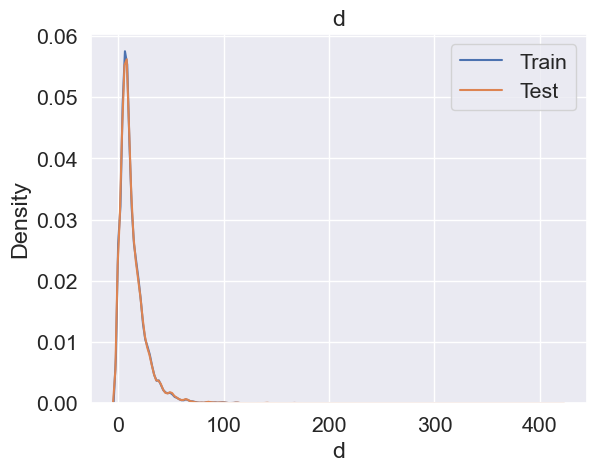

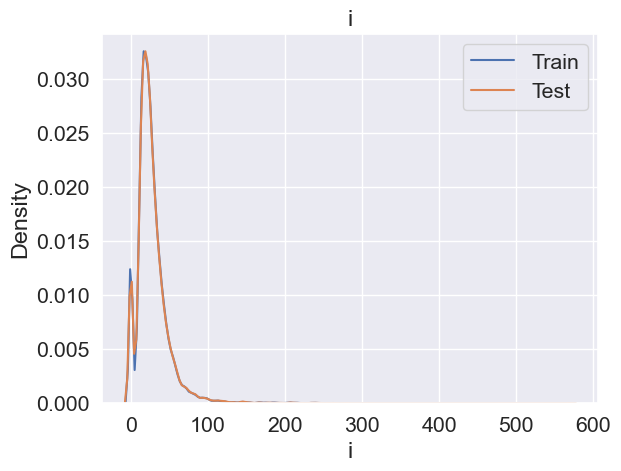

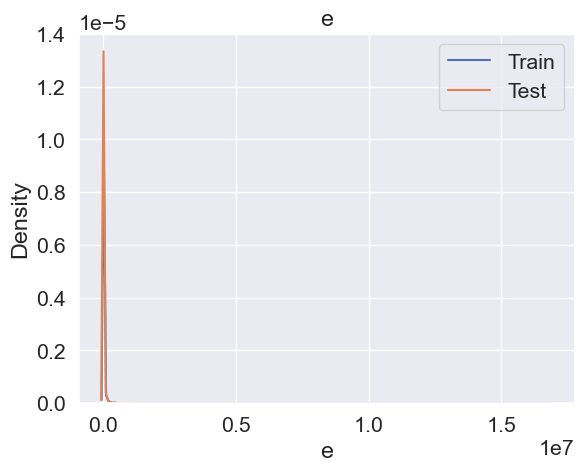

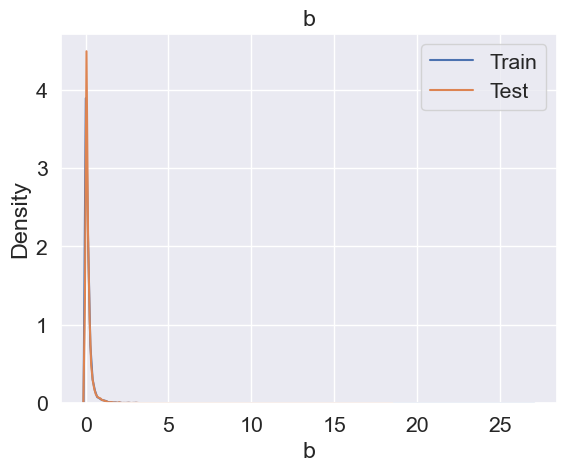

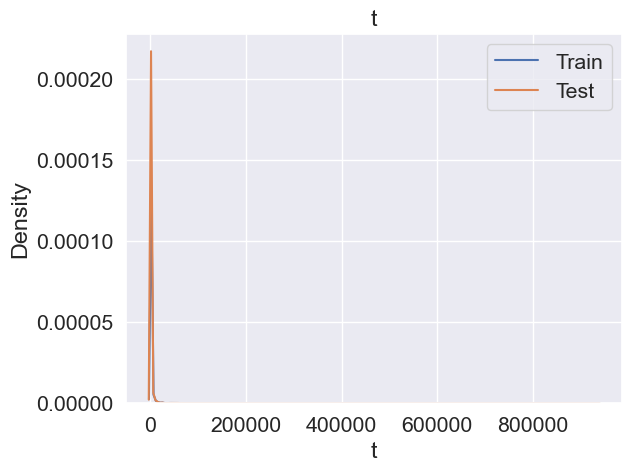

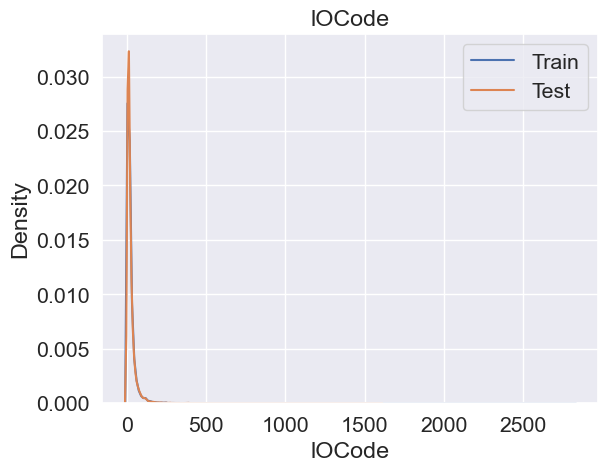

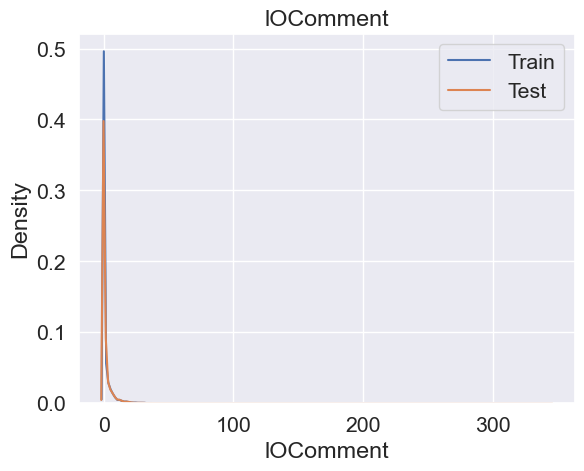

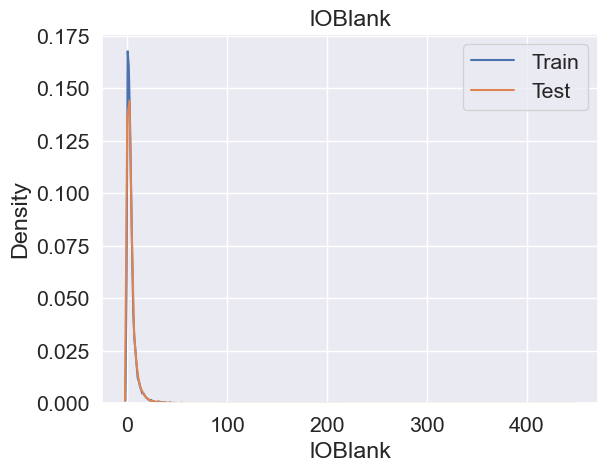

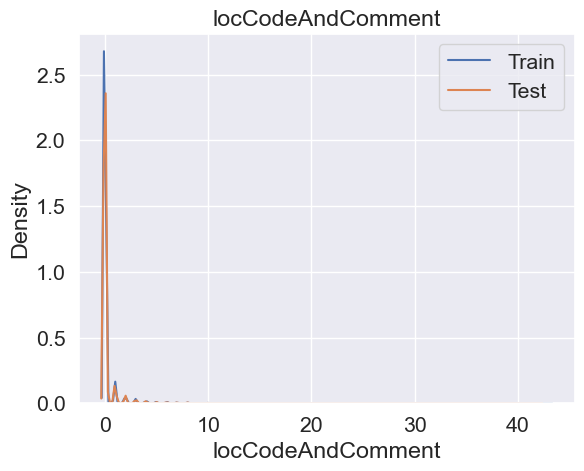

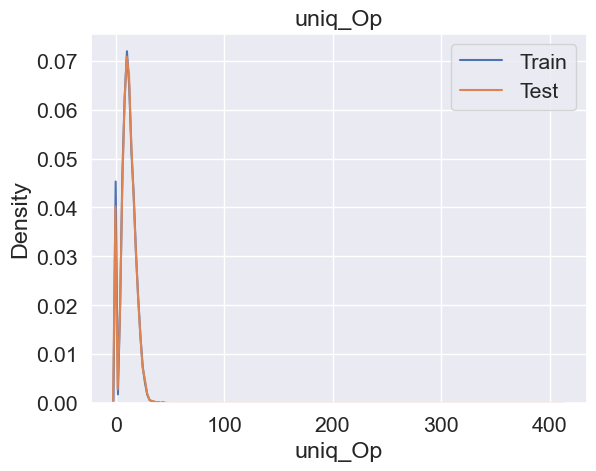

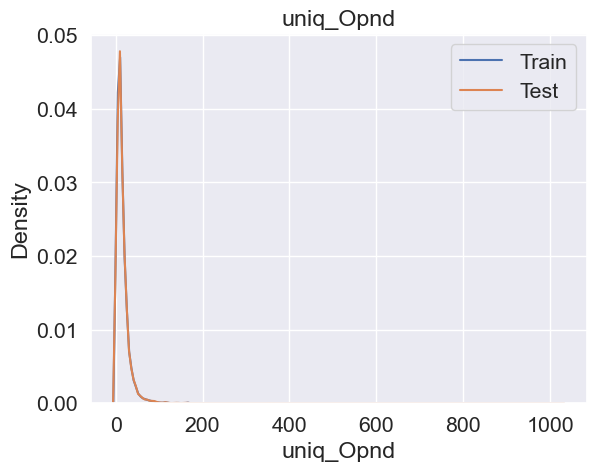

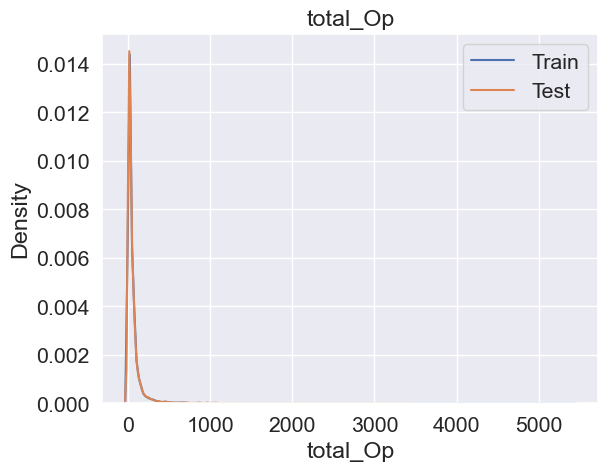

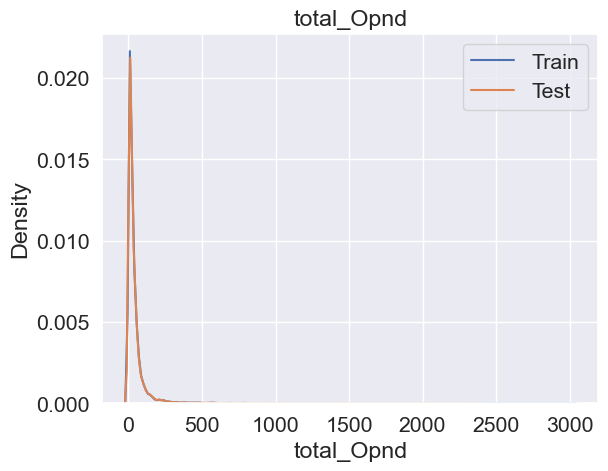

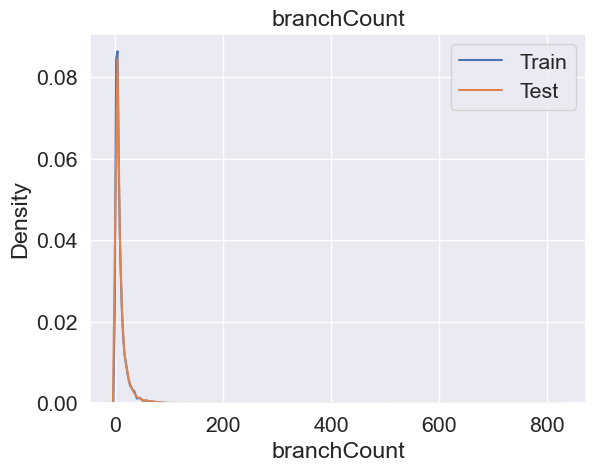

In [20]:
for column in train.columns:
    sns.kdeplot(train[column], label='Train')
    sns.kdeplot(test[column], label='Test')
    plt.title(column)
    plt.legend()
    plt.show()